In [1]:
# M2L1_Dataset_Upload.ipynb

# -----------------------------------------------------
# CELL 1: Setup & Imports (Using Groq)
# -----------------------------------------------------
import os
import uuid
import warnings
from dotenv import load_dotenv
from langsmith import Client, traceable
from langchain_groq import ChatGroq 

# Suppress the specific LangChain Deprecation Warning
warnings.filterwarnings("ignore", category=DeprecationWarning, module="langchain")

# Load environment variables (LANGCHAIN_API_KEY, GROQ_API_KEY, etc.)
load_dotenv(override=True)

# Initialize Groq Client and Langsmith Client
# Using a model confirmed to be Groq-compatible (llama-3.3-70b-versatile)
MODEL_NAME = "llama-3.3-70b-versatile"
llm_client = ChatGroq(model=MODEL_NAME)
client = Client()

print("Setup Complete. Langsmith and Groq clients initialized.")


# -----------------------------------------------------
# CELL 2: Define Example Data
# -----------------------------------------------------
# The example data provided in the original assignment
example_inputs = [
  ("How do I set up tracing to LangSmith if I'm using LangChain?", "To set up tracing to LangSmith while using LangChain, you need to set the environment variable `LANGSMITH_TRACING` to 'true'. Additionally, you must set the `LANGSMITH_API_KEY` environment variable to your API key. By default, traces will be logged to a project named \"default.\"" ),
  ("How can I trace with the @traceable decorator?", "To trace with the @traceable decorator in Python, simply decorate any function you want to log traces for by adding `@traceable` above the function definition. Ensure that the LANGSMITH_TRACING environment variable is set to 'true' to enable tracing, and also set the LANGSMITH_API_KEY environment variable with your API key. By default, traces will be logged to a project named \"default,\" but you can configure it to log to a different project if needed."),
  ("How do I pass metadata in with @traceable?", "You can pass metadata with the @traceable decorator by specifying arbitrary key-value pairs as arguments. This allows you to associate additional information, such as the execution environment or user details, with your traces. For more detailed instructions, refer to the LangSmith documentation on adding metadata and tags."),
  ("What is LangSmith used for in three sentences?", "LangSmith is a platform designed for the development, monitoring, and testing of LLM applications. It enables users to collect and analyze unstructured data, debug issues, and create datasets for testing and evaluation. The tool supports various workflows throughout the application development lifecycle, enhancing the overall performance and reliability of LLM applications."),
  ("What testing capabilities does LangSmith have?", "LangSmith offers capabilities for creating datasets of inputs and reference outputs to run tests on LLM applications, supporting a test-driven approach. It allows for bulk uploads of test cases, on-the-fly creation, and exporting from application traces. Additionally, LangSmith facilitates custom evaluations to score test results, enhancing the testing process."),
  ("Does LangSmith support online evaluation?", "Yes, LangSmith supports online evaluation as a feature. It allows you to configure a sample of runs from production to be evaluated, providing feedback on those runs. You can use either custom code or an LLM as a judge for the evaluations."),
  ("Does LangSmith support offline evaluation?", "Yes, LangSmith supports offline evaluation through its evaluation how-to guides and features for managing datasets. Users can manage datasets for offline evaluations and run various types of evaluations, including unit testing and auto-evaluation. This allows for comprehensive testing and improvement of LLM applications."),
  ("Can LangSmith be used for finetuning and model training?", "Yes, LangSmith can be used for fine-tuning and model training. It allows you to capture run traces from your deployment, query and filter this data, and convert it into a format suitable for fine-tuning models. Additionally, you can create training datasets to keep track of the data used for model training."),
  ("Can LangSmith be used to evaluate agents?", "Yes, LangSmith can be used to evaluate agents. It provides various evaluation strategies, including assessing the agent's final response, evaluating individual steps, and analyzing the trajectory of tool calls. These methods help ensure the effectiveness of LLM applications."),
  ("How do I create user feedback with the LangSmith sdk?", "To create user feedback with the LangSmith SDK, you first need to run your application and obtain the `run_id`. Then, you can use the `create_feedback` method, providing the `run_id`, a feedback key, a score, and an optional comment. For example, in Python, it would look like this: `client.create_feedback(run_id, key=\"feedback-key\", score=1.0, comment=\"comment\")`."),
]

# **FIXED SYNTAX:** Ensure list comprehensions are correctly formatted
inputs = [{"question": input_prompt} for input_prompt, _ in example_inputs]
outputs = [{"output": output_answer} for _, output_answer in example_inputs]


# -----------------------------------------------------
# CELL 3: Create and Upload Dataset (THE TWEAK)
# -----------------------------------------------------

# TWEAK: Create a new dataset using the SDK instead of assuming an existing ID.
dataset_name = f"M2L1 RAG Examples - {str(uuid.uuid4())[:8]}"

print(f"Creating new dataset: {dataset_name}...")
dataset = client.create_dataset(
    dataset_name=dataset_name, 
    description="RAG Question/Answer pairs for M2L1 testing and evaluation."
)
dataset_id = dataset.id
print(f"Dataset created with ID: {dataset_id}")


# Bulk upload examples to the newly created dataset
print(f"Uploading {len(inputs)} examples to the dataset...")
client.create_examples(
  inputs=inputs,
  outputs=outputs,
  dataset_id=dataset_id,
)
print("Dataset upload complete. Check the Langsmith UI.")


# -----------------------------------------------------
# CELL 4: Mock RAG Function & Submit Trace
# -----------------------------------------------------

# MOCK: Simulate the imported langsmith_rag function for tracing
@traceable(run_type="chain", name="Simple RAG Simulation (Groq)")
def langsmith_rag(question: str):
    # This is a basic LLM call, but it simulates the top-level RAG call
    prompt = f"Answer this technical question concisely in one sentence: {question}"
    
    # The LLM call uses the Groq client initialized in Cell 1
    response = llm_client.invoke(prompt)
    
    return response.content

# Ask a question related to the uploaded dataset content
question = "How can I trace with the @traceable decorator?"
print(f"\nSubmitting new trace for question: {question}")
answer = langsmith_rag(question)
print(f"\nAnswer: {answer}")
print("\nTrace sent to Langsmith. Check your project dashboard.")

c:\Users\Raghav Gupta\anaconda3\envs\langsmith_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup Complete. Langsmith and Groq clients initialized.
Creating new dataset: M2L1 RAG Examples - 7d2e881f...
Dataset created with ID: 06469270-a689-455d-aaf7-38d399f79654
Uploading 10 examples to the dataset...
Dataset upload complete. Check the Langsmith UI.

Submitting new trace for question: How can I trace with the @traceable decorator?

Answer: You can trace a function by applying the `@traceable` decorator above the function definition, allowing you to track its execution and log relevant information.

Trace sent to Langsmith. Check your project dashboard.


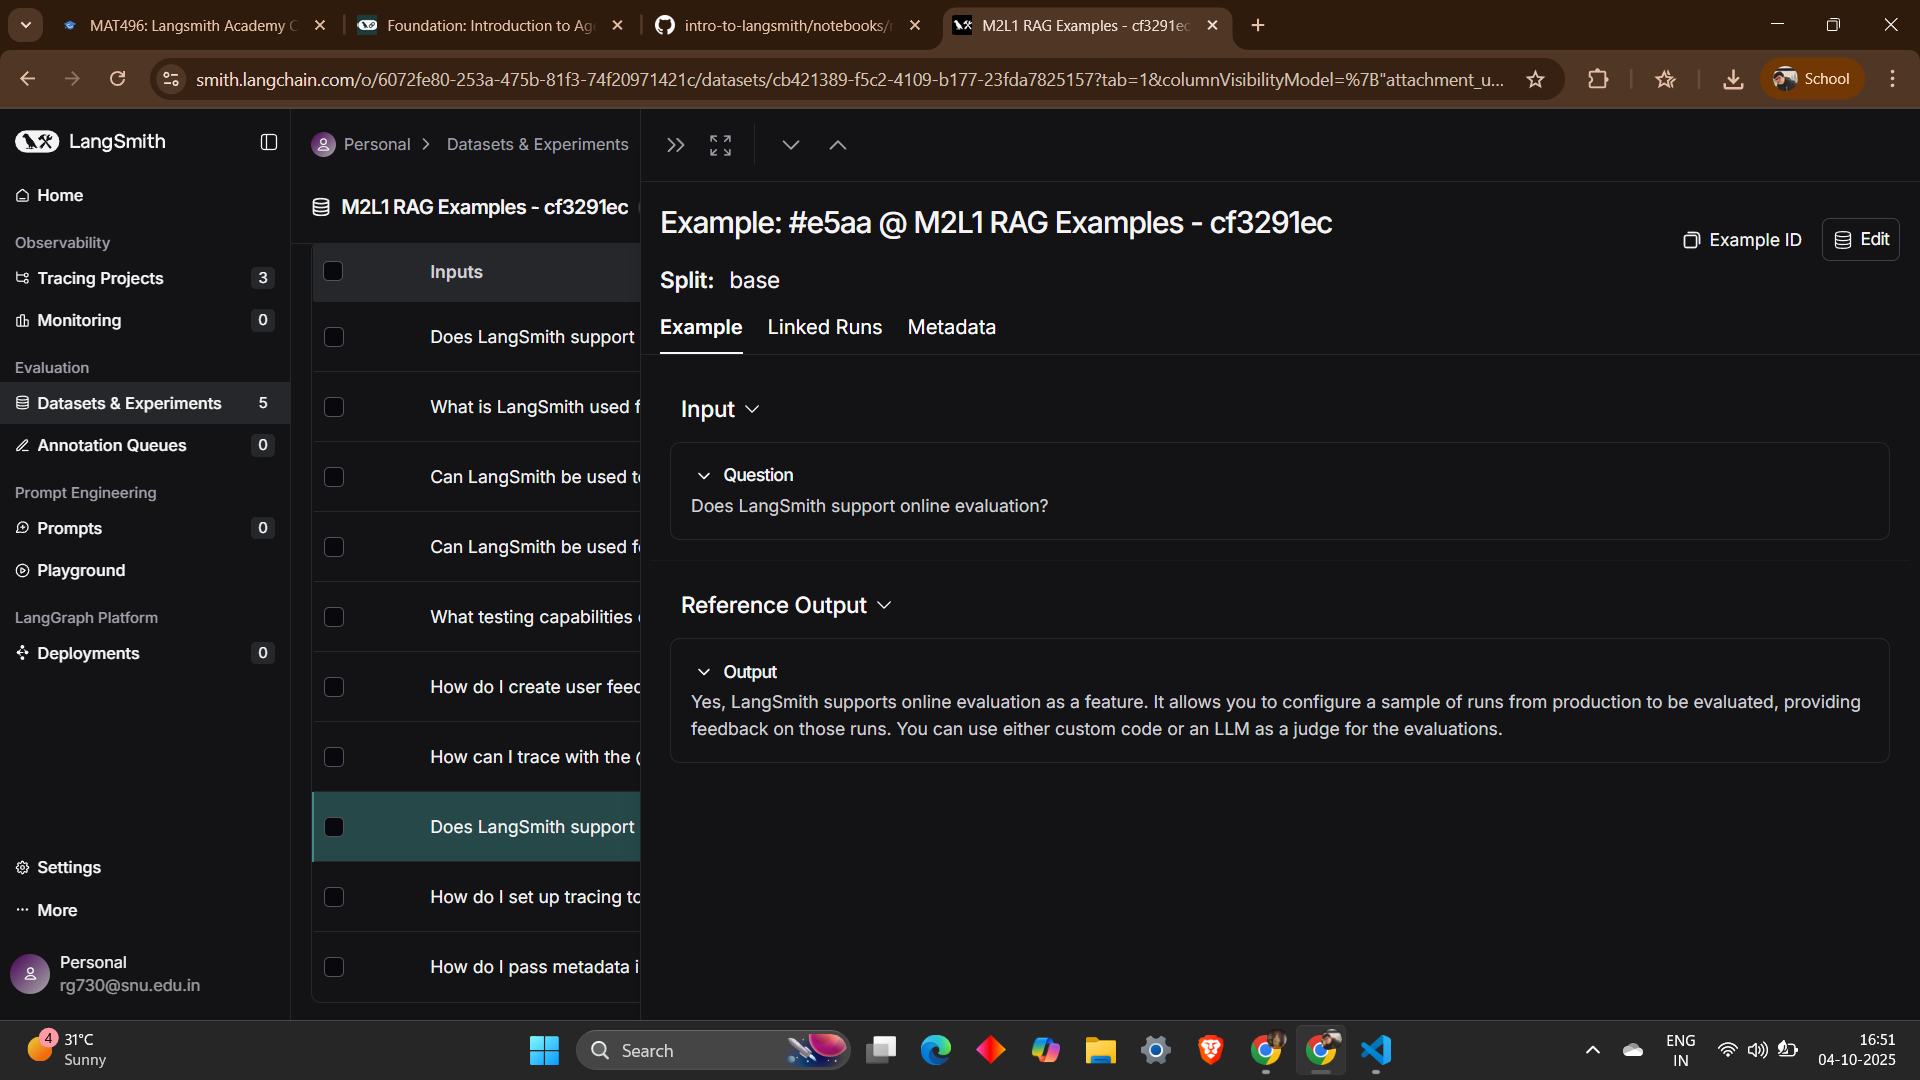